## Parte 4 - Clusterização - iFood

---
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">


### Definição do Problema

O departamento de Marketing quer entender o comportamento dos clientes do iFood, para isso fez uma solicitação para o time de Ciência de Dados para criar modelos de Machine Learning para segmentar os clientes.

### Carregando o conjunto de dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
data_dir = '/content/drive/MyDrive/datasets/ifood'
df_orders = pd.read_csv(os.path.join(data_dir, '/content/drive/MyDrive/FIA Analytics/ML/2 - Introdução ao Machine Learning/IFOOD/df_orders.csv'))

In [4]:
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11T13:22:06.497Z,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06T17:57:17.967Z,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11T20:42:32.058Z,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


In [5]:
df_orders.merchant_dish_type.value_counts() #

,count
merchant_dish_type,
Lanches,145585
Comida Brasileira,89551
Pizza,82781
Comida Japonesa,35804
Comida Saudável,19283
Açaí,16123
Comida Chinesa,12154
Comida Italiana,11530
Marmita,9285


In [6]:
df_orders.shape

(492138, 43)

# Segmentação por Tipo de Comida

**<span style="color:blue"></span> `Q1`** Crie a ABT de segmentação por tipo de comida utilizando as colunas `customer_id` e `merchant_dish_type` crie a ABT de Segmentação computando a frequência normalizada.

Salve o resultado na variável `abt_seg_tipo_comida`


In [7]:
abt_seg_tipo_comida = pd.crosstab(df_orders['customer_id'], df_orders['merchant_dish_type'], normalize='index') #Explicação sobre o que é a opção de pd.crosstab https://docs.kanaries.net/pt/topics/Pandas/pandas-crosstab #
abt_seg_tipo_comida.head()

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,...,Pizza,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba
customer_id,,,,,,,,,,,,,,,,,,,,,
0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d1765fe2ff6344dd423,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001a9f97d01d2696cf70c7657ee2d039388d691720ff99e92015c42775242f1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004720dc16aed1f98fd79f59736170e0d686199cd9ae5de6d8376365e4670f0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006a32816a3af172048de7db87c97c4c8c7ad7e6385fab3c2f57be51a67efff,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00081913eb21cd12aecc831bda704f8c6482723b55e66424100d15959b0f9141,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
abt_seg_tipo_comida.shape #tem 56 tipos de produtos que as pessoas pedem

(30079, 57)

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" /> &nbsp; **CHECKPOINT** - O DataFrame `abt_seg_tipo_comida` deverá conter exatamente `(30079, 57)`

**<span style="color:blue"></span> `Q2`** Utilizando a biblioteca `yellowbrick` crie o gráfico do cotovelo para visualizar quantos clusters devemos utilizar no KMeans.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 21)`

Utilize a variável `abt_seg_tipo_comida` para testar com k-clusters.


In [9]:
pip install yellowbrick

In [10]:
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
# Criando o modelo KMeans
model = KMeans(random_state=15)

In [12]:
# Criando o visualizador do Cotovelo
visualizer = KElbowVisualizer(model, k=(2, 21))


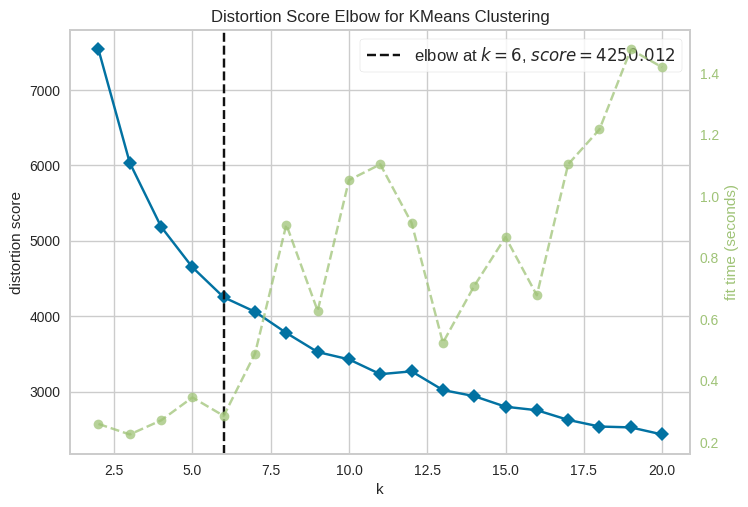

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Ajustando os dados
visualizer.fit(abt_seg_tipo_comida)
visualizer.show()

**<span style="color:blue"></span> `Q3`** Qual é a quantidade de cluster sugerida pela biblioteca `yellowbriks`? Você concorda com esse valor para k?

In [15]:
pip install scikit-learn

In [16]:
Ele informa que a quantidade de cluster deve ser de 6

SyntaxError: invalid syntax (<ipython-input-16-74884ea91a83>, line 1)

**<span style="color:blue">[RESPOSTA]:</span>**

**<span style="color:blue"></span> `Q4`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=9`
* `random_state=15`

Após crei uma nova coluna no DF `abt_seg_tipo_comida` chamada `cluster_categorias` que deverá conter o número do cluster associado as características de cada linha.

In [24]:
kmeans = KMeans(n_clusters=9,random_state=15)
kmeans.fit(X)
kmeans.labels_
abt_seg_tipo_comida["cluster_categorias"] = kmeans.labels_

In [25]:
abt_seg_tipo_comida.head()

merchant_dish_type,Africana,Argentina,Açaí,Baiana,Bebidas,Cafeteria,Carnes,Casa de Sucos,Colombiana,Comida Alemã,...,Presentes,Salgados,Sopas & Caldos,Sorvetes,Tapioca,Vegana,Vegetariana,Xis,Yakisoba,cluster_categorias
customer_id,,,,,,,,,,,,,,,,,,,,,
0001a8e61d8b08ad436e8e6f4adeb399b88df962c72d9d1765fe2ff6344dd423,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0001a9f97d01d2696cf70c7657ee2d039388d691720ff99e92015c42775242f1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0004720dc16aed1f98fd79f59736170e0d686199cd9ae5de6d8376365e4670f0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
0006a32816a3af172048de7db87c97c4c8c7ad7e6385fab3c2f57be51a67efff,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
00081913eb21cd12aecc831bda704f8c6482723b55e66424100d15959b0f9141,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [26]:
abt_seg_tipo_comida["cluster_categorias"].value_counts()

,count
cluster_categorias,
8,6961
4,5707
6,4759
2,3939
1,3335
0,2306
3,1698
7,783
5,591


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

**<span style="color:blue"></span> `Q5`** Faça a avaliação do ajuste do KMeans

1.   List item
2.   List item

utilizando o Mapa de Calor.

O que podemos concluir?


**<span style="color:blue">[RESPOSTA]:</span>**

**<span style="color:blue"></span> `Q6`** Utilize a técnica Surrougate Tree para selecionar as 9 variáveis mais importantes.

* Ajuste a Árvore de Decisão. Lembre-se de no fit remover a coluna `cluster_categorias` das features (colunas), uma vez que é isso que queremos identificar, sendo o nosso alvo.
* Recupere as 9 features mais importantes.
* Faça o mapa de calor para facilitar as conclusões sobre os grupos e quais variáveis impactam mais cada grupo gerado.
* Faça uma análise do resultado obtido no mapa de calor.

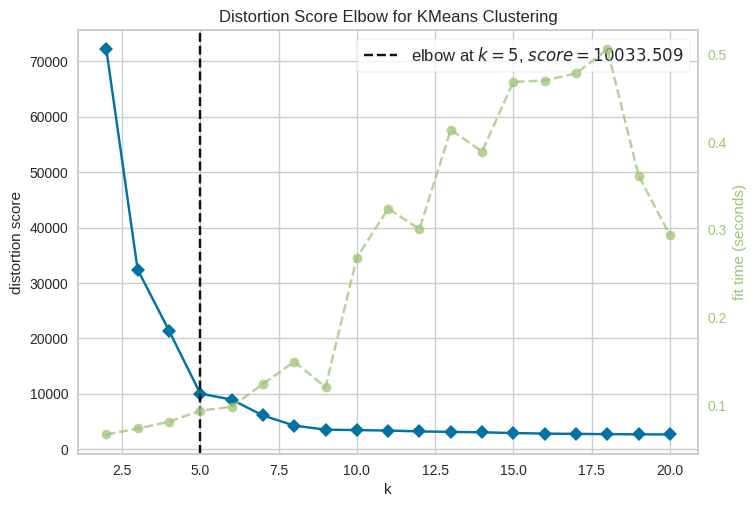

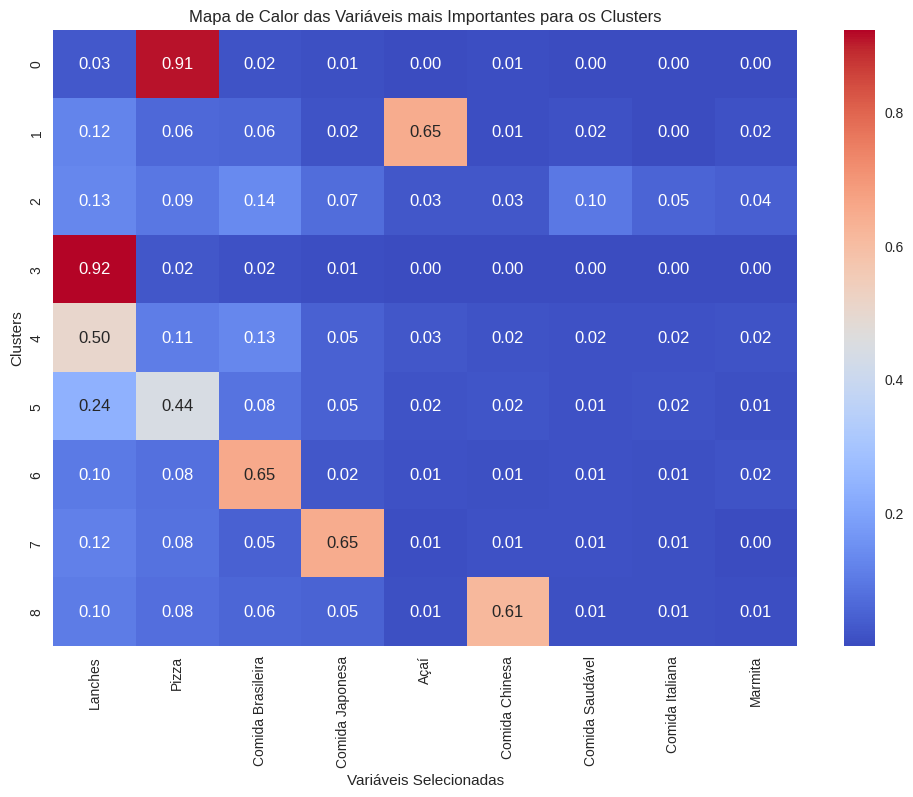

As variáveis mais impactantes na definição dos clusters são:
Index(['Lanches', 'Pizza', 'Comida Brasileira', 'Comida Japonesa', 'Açaí',
       'Comida Chinesa', 'Comida Saudável', 'Comida Italiana', 'Marmita'],
      dtype='object', name='merchant_dish_type')


In [23]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Supondo que a variável abt_seg_tipo_comida já esteja carregada como um DataFrame ou array

# Criando o modelo KMeans
model = KMeans(random_state=15)

# Criando o visualizador do Cotovelo
visualizer = KElbowVisualizer(model, k=(2, 21))

# Ajustando os dados
visualizer.fit(abt_seg_tipo_comida)
visualizer.show()

# Ajustando KMeans com n_clusters=9
final_kmeans = KMeans(n_clusters=9, random_state=15)
abt_seg_tipo_comida['cluster_categorias'] = final_kmeans.fit_predict(abt_seg_tipo_comida)

# Selecionando as features e o alvo
X = abt_seg_tipo_comida.drop(columns=['cluster_categorias'])
y = abt_seg_tipo_comida['cluster_categorias']

# Ajustando a Árvore de Decisão para identificar as features mais importantes
clf = DecisionTreeClassifier(random_state=15)
clf.fit(X, y)

# Recuperando as 9 features mais importantes
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(9).index

# Criando o Mapa de Calor com as variáveis mais importantes
plt.figure(figsize=(12, 8))
sns.heatmap(abt_seg_tipo_comida.groupby('cluster_categorias')[top_features].mean(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Variáveis Selecionadas')
plt.ylabel('Clusters')
plt.title('Mapa de Calor das Variáveis mais Importantes para os Clusters')
plt.show()

# Análise dos resultados obtidos no mapa de calor
print("As variáveis mais impactantes na definição dos clusters são:")
print(top_features)


**<span style="color:blue">[RESPOSTA]:</span>**

# Segmentação por RFV

**<span style="color:blue"></span> `Q7`** Crie a ABT para a segmentação por RFV utilizando a base `df_orders` com as seguintes características:

* Faça o agrupamento pelo `customer_id`.
* Aplicar a função de agregação `count` para `order_id` e o resultado deve ser salvo em uma nova coluna com o nome de `total_pedidos`.
* Aplicar a função de agregação `sum` para `order_total` e o resultado deve ser salvo em uma nova coluna com o nome de `total_receita`.
* Reinicie o index da estrutura criada e salve na variável `abt_rfv`.



In [ ]:
abt_rfv=(
    df_orders
    .groupby('customer_id') #representa a linha
    .agg(
        total_pedidos=('order_id', 'count'),
        total_receita=('order_total', 'sum')
    )
    .reset_index()
)
abt_rfv.head()

In [ ]:
abt_rfv.shape

**<span style="color:blue"></span> `Q8`** Faça o ranqueamento (rank) das colunas `total_pedidos` e `total_receita` com a opção `pct=True` e adicione o resultado no mesmo DF `abt_rfv`, sendo o nome da duas novas colunas como `rank_pct_pedidos` e `rank_pct_receita` respectivamente.

In [ ]:
abt_rfv['rank_pct_pedidos'] = abt_rfv['total_pedidos'].rank(pct=True) #pct=True já trás em percentual
abt_rfv['rank_pct_receita'] = abt_rfv['total_receita'].rank(pct=True)
abt_rfv.head()

In [ ]:
abt_rfv.shape

**<span style="color:blue"></span> `Q9`** Utilizando a biblioteca `yellowbrick` crie o gráfica do cotovelo para visualizar quantos clusters devemos utilizar no KMeans na base `abt_rfv`.

Os seguintes parâmetros devem ser considerados:
* `random_state=15`
* `k=(2, 10)`

Utilize as features `rank_pct_pedidos` e `rank_pct_receita` do DF `abt_rfv` para testar com k-clusters.

**<span style="color:blue"></span> `Q10`** Ajuste o KMeans com os seguintes parâmetros:

* `n_clusters=4`
* `random_state=15`

Após crei uma nova coluna no DF `abt_rfv` chamada `cluster_fv` que deverá conter o número do cluster associado as características de cada linha.

**<span style="color:blue"></span> `Q11`** Faça o plot do tipo `scatter` considerando os seguintes parâmetros:

`x='rank_pct_pedidos', y='rank_pct_receita', hue='cluster_fv', s=50, pallete='deep'`

Utilize a biblioteca `seaborn`.


**<span style="color:blue"></span> `Q12`** Faça um único plot dos dois gráficos criados anteriormente (mapa de calor e o plot do tipo `scatter`). Utilize as variáveis `abt_seg_tipo_comida` e `abt_rfv`.

**<span style="color:blue"></span> `Q13`** Faça a junção da `abt_seg_tipo_comida` com a `abt_rfv`. Lembre-se de reiniciar o indices da `abt_seg_tipo_comida` e utilize o seguintes parâmetros na junção (`merge`):

* `on='customer_id'`
* `how='left'`

Por fim, filtre apenas as colunas: `'customer_id', 'cluster_categorias', 'cluster_fv'`.

Salve o resultado na variável `resultado_segmentacao`.

**<span style="color:blue"></span> `Q14`** Faça o agrupamento pelo `cluster_categorias` e `cluster_fv` para visualizar a quantidade de clientes que existem em cada categoria gerada em relação aos grupos de frequência e venda.

* Utilize a função de agregação `count`
* Utilize a função `unstack` para facilitar a visualização
* Salve na variável `resultado_analise`.

Por fim, crie uma nova coluna, chamada `total`, nesse DF com a soma total de clientes dentro de cada cada grupo do `cluster_categorias`.

**<span style="color:blue"></span> `Q15`** Faça uma análise sobre os resultados obtidos nos exercícios Q12, Q13 e Q14.

Para facilitar, utilize a variável `resultado_segmentacao` para verificar a frequencia dos grupos gerados no `cluster_fv` dentro dos grupos do `cluster_categorias`.

**<span style="color:blue">[RESPOSTA]:</span>**
